In [1]:
from read_data import read_enhanced_microscore_dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from plots import first_plot, second_plot, third_plot, forth_plot, plot_performance, fith_plot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error
import numpy as np

In [2]:
df = read_enhanced_microscore_dataset()

In [3]:
df_base = df[[
    "Habitaciones",
    "Aseos",
    "Terraza",
    "Piscina",
    "Garaje",
    "Precio",
    "Metros",
    "CodigoPostal",
    "Latitud",
    "Longitud",
    'Caracteristicas'
]]

In [4]:
df_microscore = df[[
    "Habitaciones",
    "Aseos",
    "Terraza",
    "Piscina",
    "Garaje",
    "Precio",
    "Metros",
    "CodigoPostal",
    "Latitud",
    "Longitud",
    "RentaBrutaHogar",
    "RentaBrutaPersona",
    "poblacion_2023",
    "%_servicios",
    "densidad_inm_m2",
    "%_agricultura",
    "%_industria",
    "%_construccion",
    'Caracteristicas',
    'University_Distance',
    'School_Distance', 'Kindergarten_Distance', 'City Center_Distance',
       'Supermarket_Distance', 'Bakery_Distance', 'Hospital_Distance',
       'Pharmacy_Distance', 'Restaurant_Distance', 'Café_Distance',
       'Park_Distance', 'Gym_Distance', 'Movie Theater_Distance',
       'Theater_Distance', 'Shopping Mall_Distance', 'Bus Stop_Distance',
       'Metro Station_Distance', 'Score'
]]

In [5]:
def prepare_data(df):
    categorical_cols = ['Caracteristicas']
    df = pd.get_dummies(df, columns=categorical_cols)
    df = df.fillna(-1)
    return df

In [6]:
df_base =prepare_data(df_base)
df_microscore =prepare_data(df_microscore)

In [7]:


def random_forest_kfold(df, n_estimators=100, random_state=56):
    X = df.drop(columns=["Precio"]) 
    y = df["Precio"]  
    
    # KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
    
    # RandomForestRegressor
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    
    mae_list = []
    rmse_list = []
    mape_list = []
    
    # 5-fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Entrenamiento RandomForestRegressor
        rf.fit(X_train, y_train)
        
        # Prediccion
        y_pred = rf.predict(X_test)
        
        # Metricas
        mae = mean_absolute_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        
        mae_list.append(mae)
        rmse_list.append(rmse)
        mape_list.append(mape)
        
        print(f"Fold Results - MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2%}")

        
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    print(feature_importance)
    avg_mae = np.mean(mae_list)
    avg_rmse = np.mean(rmse_list)
    avg_mape = np.mean(mape_list)
    
    print("\n--- Metricas Cross-Validation ---")
    print(f"Average MAE: {avg_mae:.2f}")
    print(f"Average RMSE: {avg_rmse:.2f}")
    print(f"Average MAPE: {avg_mape:.2%}")
    
    return y_test, y_pred

In [8]:
y_test_base, y_pred_base = random_forest_kfold(df_base, n_estimators=20)

Fold Results - MAE: 53208.11, RMSE: 139545.17, MAPE: 23.86%
Fold Results - MAE: 52279.33, RMSE: 131696.97, MAPE: 23.16%
Fold Results - MAE: 52968.56, RMSE: 142215.20, MAPE: 23.50%
Fold Results - MAE: 51679.74, RMSE: 130253.64, MAPE: 22.79%
Fold Results - MAE: 52392.17, RMSE: 128293.95, MAPE: 23.70%
                         Feature  Importance
1                          Aseos    0.339364
5                         Metros    0.210310
6                   CodigoPostal    0.145779
8                       Longitud    0.132315
7                        Latitud    0.118436
0                   Habitaciones    0.023799
3                        Piscina    0.012759
4                         Garaje    0.006457
2                        Terraza    0.005908
11         Caracteristicas_House    0.001981
9      Caracteristicas_Apartment    0.001776
10  Caracteristicas_CountryHouse    0.001117

--- Cross-Validation Metrics ---
Average MAE: 52505.58
Average RMSE: 134400.99
Average MAPE: 23.40%


In [9]:
y_test_micro, y_pred_micro = random_forest_kfold(df_microscore, n_estimators=20)

Fold Results - MAE: 54485.90, RMSE: 140255.02, MAPE: 24.44%
Fold Results - MAE: 53850.20, RMSE: 132861.80, MAPE: 24.03%
Fold Results - MAE: 54509.32, RMSE: 151713.67, MAPE: 24.39%
Fold Results - MAE: 52670.58, RMSE: 126203.96, MAPE: 24.06%
Fold Results - MAE: 53525.68, RMSE: 130439.35, MAPE: 24.48%
                         Feature  Importance
1                          Aseos    0.299888
5                         Metros    0.176710
10             RentaBrutaPersona    0.137679
8                       Longitud    0.070504
6                   CodigoPostal    0.029090
7                        Latitud    0.027017
12                   %_servicios    0.020651
13               densidad_inm_m2    0.012709
23             Hospital_Distance    0.012426
14                 %_agricultura    0.012082
32             Bus Stop_Distance    0.011950
25           Restaurant_Distance    0.011796
20          City Center_Distance    0.011689
18               School_Distance    0.011252
29        Movie Theater_D

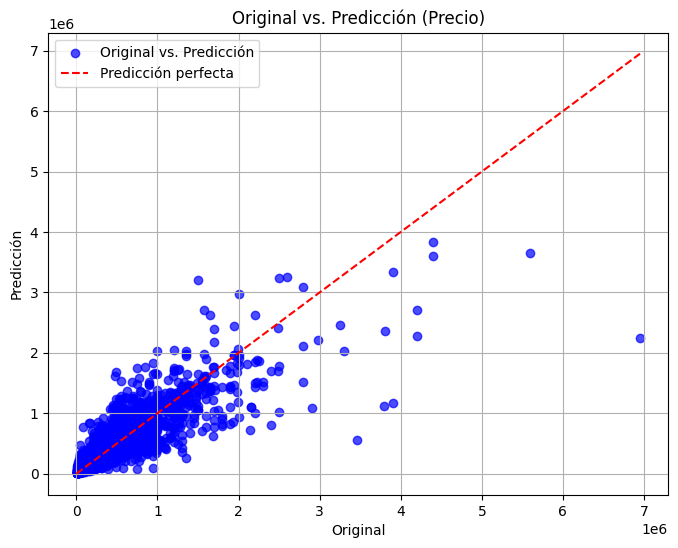

C:\Users\emebe\Documents\GitHub\tfm_cleaned\plots.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


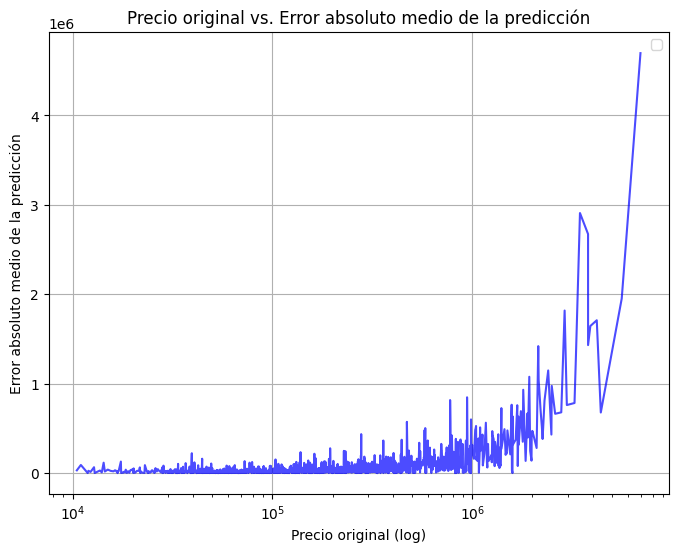

C:\Users\emebe\Documents\GitHub\tfm_cleaned\plots.py:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


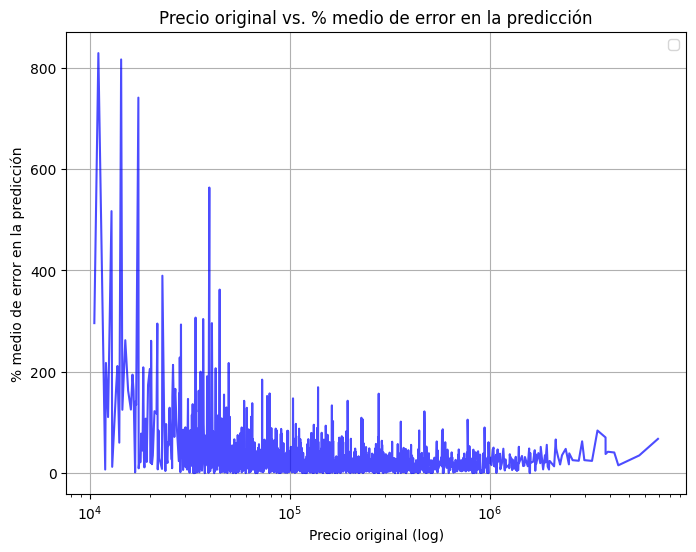

C:\Users\emebe\Documents\GitHub\tfm_cleaned\plots.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df_plot.groupby("log_bin")["%error"].mean().reset_index()


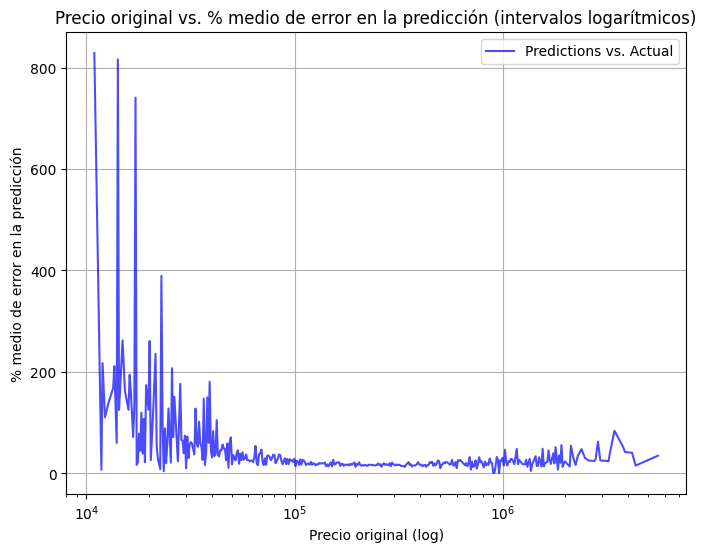

In [11]:
plot_performance(y_test_base, y_pred_base)

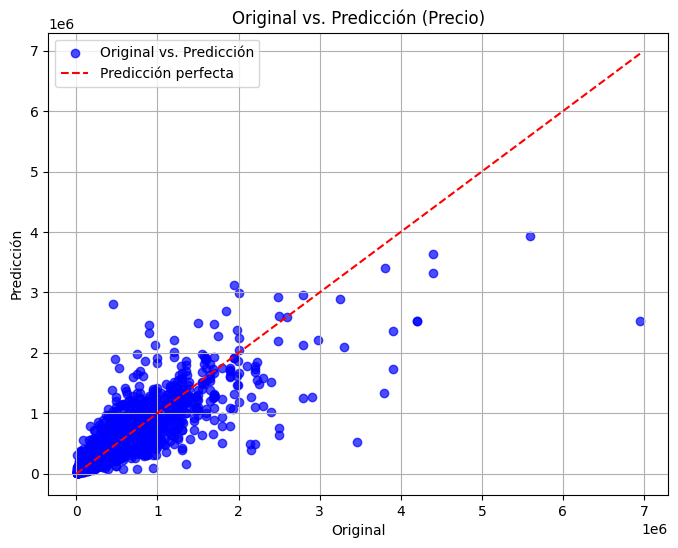

C:\Users\emebe\Documents\GitHub\tfm_cleaned\plots.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


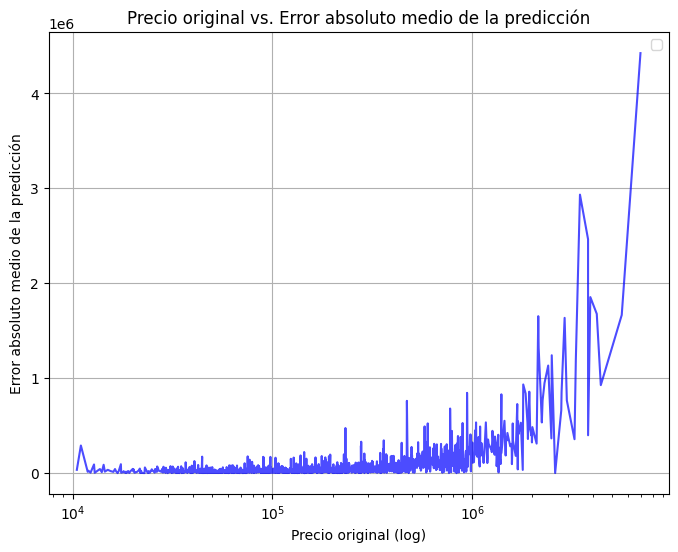

C:\Users\emebe\Documents\GitHub\tfm_cleaned\plots.py:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


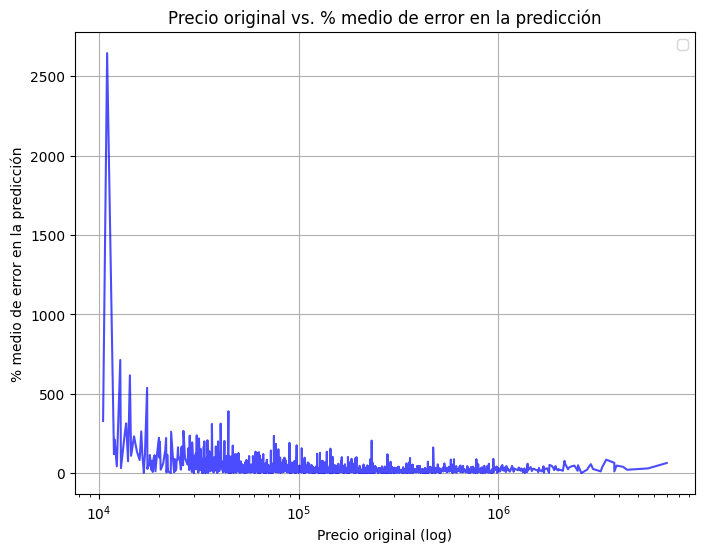

C:\Users\emebe\Documents\GitHub\tfm_cleaned\plots.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df_plot.groupby("log_bin")["%error"].mean().reset_index()


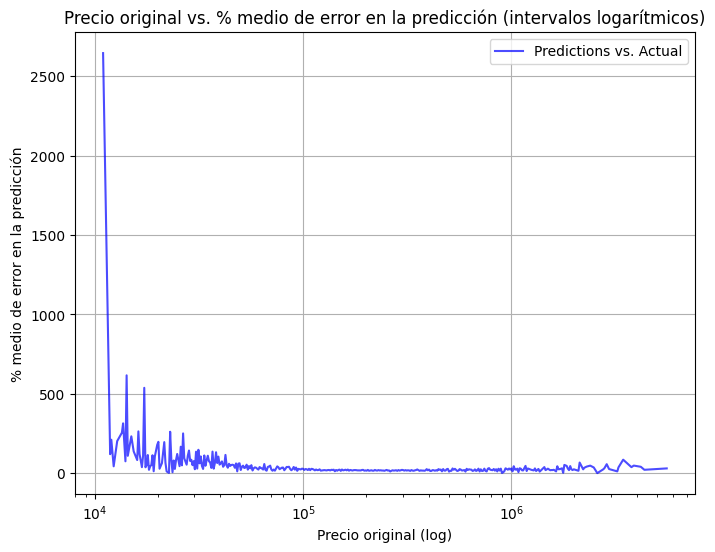

In [12]:
plot_performance(y_test_micro, y_pred_micro)

C:\Users\emebe\Documents\GitHub\tfm_cleaned\plots.py:156: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_blue = df_plot_base.groupby("log_bin")["%error"].mean().reset_index()
C:\Users\emebe\Documents\GitHub\tfm_cleaned\plots.py:163: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_red = df_plot__micro.groupby("log_bin")["%error"].mean().reset_index()


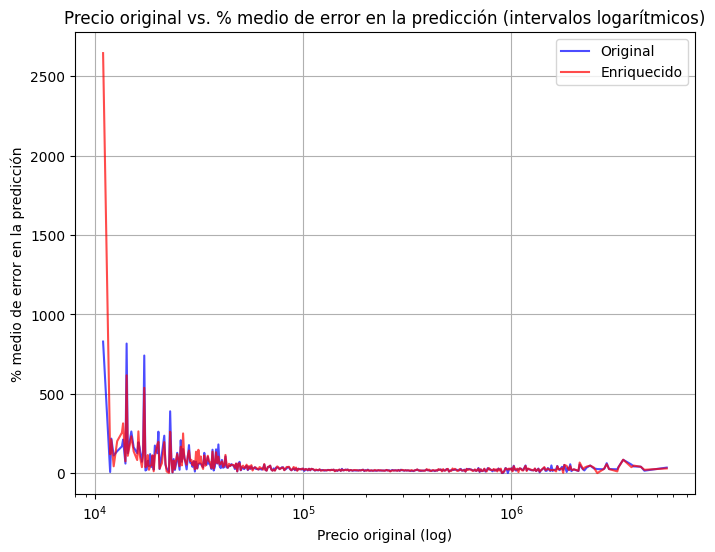

In [13]:
fith_plot(y_test_base, y_pred_base, y_test_micro, y_pred_micro)